#### This is a personal project in light of the sweeping pandemic of COVID-19

    Amidst school shutting down and switching to online classes, I figured this would be a great oppurtunity to explore the disease's impact strictly through data. The visualization and data manipulation really put into scale how community spread occurs / the importance of Social Distancing and quarantining if necessary.
    
    The data is sourced from a CSV that directly updates the data according to the WHO and is updated daily as of this script creation.

Goals for this project:

    - Compare progression of the United State's increased developement of cases to more 'mature' countries with the virus such as S. Korea, Italy, and China
    - Acknowledge certain polictical decisions that pertain to the prevention of community spread and track whether their decision were successful as evident via the data
 
The source concatenating the WHO daily reports:
https://ourworldindata.org/coronavirus-source-data

Why this reported data should be analyzed, yet taken with skepticism:
https://www.youtube.com/watch?v=1Pb01T3Ew4Y

In [1]:
## Imports & Constants
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime
import os
import requests
%matplotlib inline

In [2]:
# Retrieves Data .csv (udpdated daily during heat of the pandemic) 
url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
response = requests.get(url)
with open(os.path.join("./", "full_data.csv"), 'wb') as f:
    f.write(response.content)
df = pd.read_csv('full_data.csv')
print('Data Updated! Timestamp: ' + str(datetime.datetime.today()))
# df.columns

Data Updated! Timestamp: 2020-03-21 12:08:01.408968


In [3]:
### Quick Stat on Worst Countries
without_worldwide = df.loc[(df['location'] != 'World')]
print('***Top Deadliest Country***')
without_worldwide.sort_values(['total_deaths','date'], ascending=False).iloc[0,:]

***Top Deadliest Country***


date            2020-03-21
location             Italy
new_cases             5986
new_deaths             625
total_cases          47021
total_deaths          4032
Name: 2991, dtype: object

In [4]:
print('***Most Rapid Community Spread***')
## order of sortable attributes matters -> priority for the first 
without_worldwide.sort_values(['date','new_cases',], ascending=False).iloc[0,:]

***Most Rapid Community Spread***


date            2020-03-21
location             Italy
new_cases             5986
new_deaths             625
total_cases          47021
total_deaths          4032
Name: 2991, dtype: object

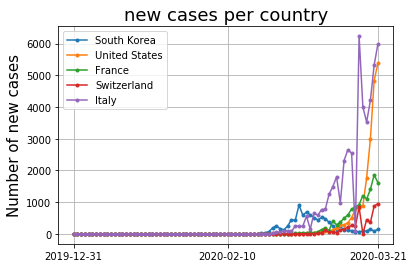

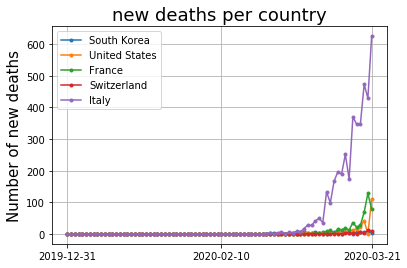

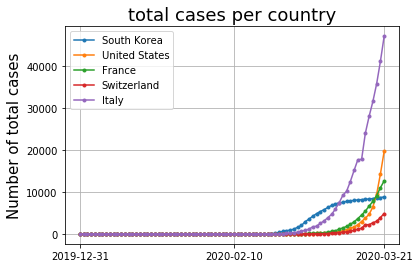

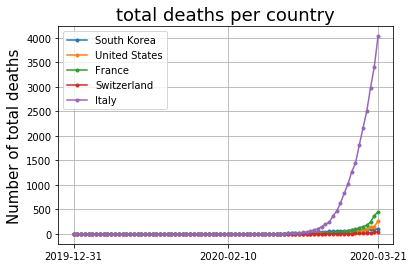

In [16]:
### This is a quick and dirty method to visualize any country and its attr with a single call
### It has formatting and data-cleanliness issues when combining plots! But it is nice for debugging
# Places of interest based on the media and personal preference
places = [ 'South Korea', 'United States' , 'France', 'Switzerland', 'Italy']
# 'United States'
categories = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths']
for category in categories:
    for name in places:
        country = df.loc[(df['location'] == name)].sort_values(['date'])
        x = country.date
        y = country[category]
        plt.plot(x, y, marker='.', label=name) 
    plt.title(category.replace('_', ' ') + ' per country', fontsize = 18)
    plt.ylabel("Number of " + category.replace('_', ' '), fontsize = 15)
    plt.legend()
    plt.grid()
    plt.xticks([0 , math.floor(len(x)/2), len(x)-1])
    plt.show()
    

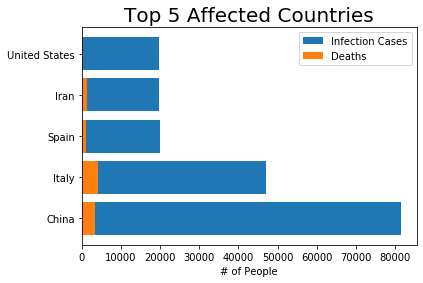

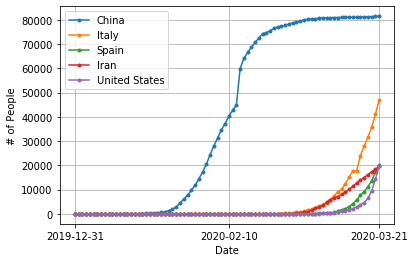

In [6]:
### Bar and Plot Graph of the current Top 5 Most-Effected Nations due to COVID-19
top_5 = without_worldwide.sort_values(['date', 'total_cases'], ascending=False).head(5)
names = top_5.location
total_cases_bar = plt.barh(names, top_5.total_cases)
total_deaths_bar = plt.barh(names, top_5.total_deaths)
plt.legend((total_cases_bar[0], total_deaths_bar[0]), ('Infection Cases', 'Deaths'))
plt.xlabel('# of People')
plt.title('Top 5 Affected Countries', fontsize = 20)
plt.show()


for name in names.tolist():
    country = df.loc[(df['location'] == name)]
    x = country.date
    y = country['total_cases']
    plt.plot(x, y, marker='.')
plt.xlabel("Date")
plt.ylabel('# of People')
plt.legend(names.tolist())
plt.xticks([0 , math.floor(len(x)/2), len(x)-1])
plt.grid()
plt.show()

In [15]:
### Today's Statistics
count = 0
d = datetime.datetime.today() - datetime.timedelta(days=0)
stats_today = df.loc[(df['date'] == d.strftime('%Y-%m-%d'))]
while True:
    d = datetime.datetime.today() - datetime.timedelta(days=count)
    stats_today = df.loc[(df['date'] == d.strftime('%Y-%m-%d'))]
    if stats_today.size != 0:
        break
    count += 1
print('*** Current Worldwide Stats ('+ d.strftime('%D') +') ***')
# drops repeated date and resets index
stats_today = stats_today.sort_values(['total_cases'], ascending=False).head(11).drop(['date'], axis=1).reset_index(drop=True)
stats_today['death_ratio'] = (stats_today.total_deaths / stats_today.total_cases) * 100

### Infection rate calculation of coefficient between points
infection_rates = []
for location in stats_today.location:
    country = df.loc[(df['location'] == location)].loc[(df['total_cases'] > 0)]
    ### First row has total_cases == new_cases -> divide by 0 error so it is removed
    country = country.drop(country.index[0])
    country['rate'] = (country.total_cases / (country.total_cases - country.new_cases))
    infection_rates.append(country['rate'].mean())
# Rough but comparable stat
stats_today['ave_infection_rate'] = infection_rates

stats_today.drop(stats_today.index[0]).style.highlight_max(axis=0)

*** Current Worldwide Stats (03/21/20) ***


,location,new_cases,new_deaths,total_cases,total_deaths,death_ratio,ave_infection_rate
1,China,79,7,81416,3261,4.00536,1.12223
2,Italy,5986,625,47021,4032,8.57489,1.31642
3,Spain,2833,235,19980,1002,5.01502,1.26009
4,Iran,1237,149,19644,1433,7.29485,1.41848
5,United States,5374,110,19624,260,1.32491,1.20569
6,Germany,4185,2,18323,45,0.245593,1.25032
7,France,1617,78,12612,450,3.56803,1.18111
8,South Korea,147,3,8799,103,1.17059,1.18763
9,Switzerland,952,10,4840,43,0.88843,1.62102
10,United Kingdom,706,33,3983,177,4.44389,1.18164


In [ ]:
# some options
a, b = 1, 5
# selecting global variables without underscores
global_variables = list(globals().keys())
funcs = []
for i in global_variables:
    if '_' not in i:
        funcs.append(i)
 
# creating menu with them   
global_vars = widgets.Dropdown(
    options=funcs)
# button, output, function and linkage
butt = widgets.Button(description='Print Variable')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
        print(type(globals()[global_vars.value]))
        print(globals()[global_vars.value])
        
butt.on_click(on_butt_clicked)
# display
widgets.VBox([global_vars,butt,outt])